<a href="https://colab.research.google.com/github/RandomForestRanger/Cookbooks/blob/master/Seaborn_Scatterplot_GDELt_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Pip installation
!pip install --upgrade -q gspread
!pip install gspread-dataframe
!pip install seaborn

In [0]:
#import libraries
import numpy as np
import pandas as pd
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [0]:
#authorise node to access Gdrive via KDL
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
#link to pre-opened csv file in my gdrive 
data1 = gc.open_by_url('https://docs.google.com/spreadsheets/d/13PMYx5dtDKmbikSbtuJu31fAKoHDGlDHInOqX7zUKNQ/edit?usp=drive_web&ouid=114962091797899886216')

In [0]:
#get the data as a worksheet  
ws = data1.worksheet('GDELTdata')

In [0]:
#convert the data to pandas dataframe (can include argument , header = None   if this is needed)
Woernjaps = get_as_dataframe(ws)
#inspect data
Woernjaps.tail()

,DATE,LAT,LONG,HUMANNAME,COUNT,GOLDSTEIN,SAMPLEURL,Unnamed: 7,Unnamed: 8
4393,20000510.0,-24.9314,30.8419,"Graskop, Mpumalanga, South Africa",4.0,-6.5,NaN,NaN,NaN
4394,20121121.0,-33.9167,18.4167,"Cape Town, Western Cape, South Africa",4.0,-6.5,NaN,NaN,NaN
4395,20120516.0,-31.4113,26.4870,"Braamfontein, Eastern Cape, South Africa",4.0,-6.5,NaN,NaN,NaN
4396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#since g-sheets brings along a lot of empty/Nan cellumns or rows, this chops them out. Can replace "all" with "any" if I want to discard any incomplete collumns or rows
Woernjaps.dropna(axis=1, how='all' ,inplace=True )
Woernjaps.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)
Woernjaps.tail()

,DATE,LAT,LONG,HUMANNAME,COUNT,GOLDSTEIN,SAMPLEURL
4391,20151008.0,-26.0833,28.2500,"Gauteng, Gauteng, South Africa",4.0,-6.5,http://www.enca.com/south-africa/pics-cosatu-m...
4392,20031114.0,-26.2667,27.8667,"Soweto, Gauteng, South Africa",4.0,-6.5,NaN
4393,20000510.0,-24.9314,30.8419,"Graskop, Mpumalanga, South Africa",4.0,-6.5,NaN
4394,20121121.0,-33.9167,18.4167,"Cape Town, Western Cape, South Africa",4.0,-6.5,NaN
4395,20120516.0,-31.4113,26.4870,"Braamfontein, Eastern Cape, South Africa",4.0,-6.5,NaN


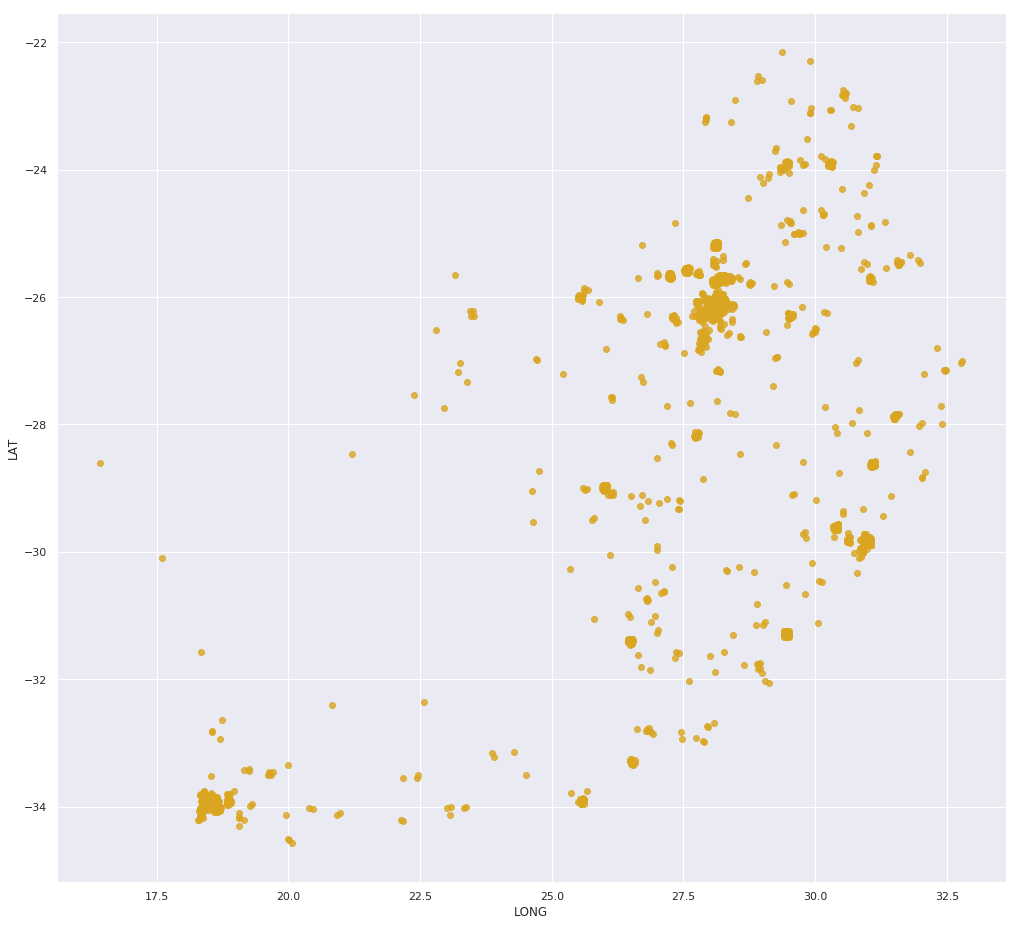

In [0]:
sns.set(rc={'figure.figsize':(17,16)})
ax = sns.regplot(x=Woernjaps["LONG"], y=Woernjaps["LAT"], fit_reg=False, x_jitter=0.05, y_jitter=0.05, color = "goldenrod")


In [0]:
! pip install folium
import folium

In [0]:
m = folium.Map(location=[-30, 25], tiles="OpenStreetMap", zoom_start=6, )

for i in range(0, 1200):  #len(Woernjaps)
   folium.Circle(
      location=[Woernjaps.iloc[i]['LAT'], Woernjaps.iloc[i]['LONG']],
      popup=Woernjaps.iloc[i]['HUMANNAME'],
      radius=Woernjaps.iloc[i]['COUNT']*500,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)


m

In [0]:
from folium.plugins import FastMarkerCluster



z = 6

my_map = folium.Map(location=[-30, 25], tiles="OpenStreetMap", zoom_start=z)

callback = ('function (row) {' 
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "red",  radius: 10000});'
                'return circle};')


my_map.add_child(FastMarkerCluster(Woernjaps[['LAT', 'LONG']].values.tolist(), callback=callback))

my_map